<center><h1> <b> Titanic Survival Prediction </b> </h1></center>

<center> <h3> <b> Main Goal : </b> </h3> <h4> <b> Predicts whether a
passenger on the Titanic survived or not. </b> </h4> </center>

<center> <h4> <b> Import necesaary libraries </h4> </b> </center>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<center> <h4> <b> Import dataset </h4> </b> </center>

In [7]:
df= pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<center> <h4> <b> Exploratory data analysis </h4> </b> </center>

<Axes: >

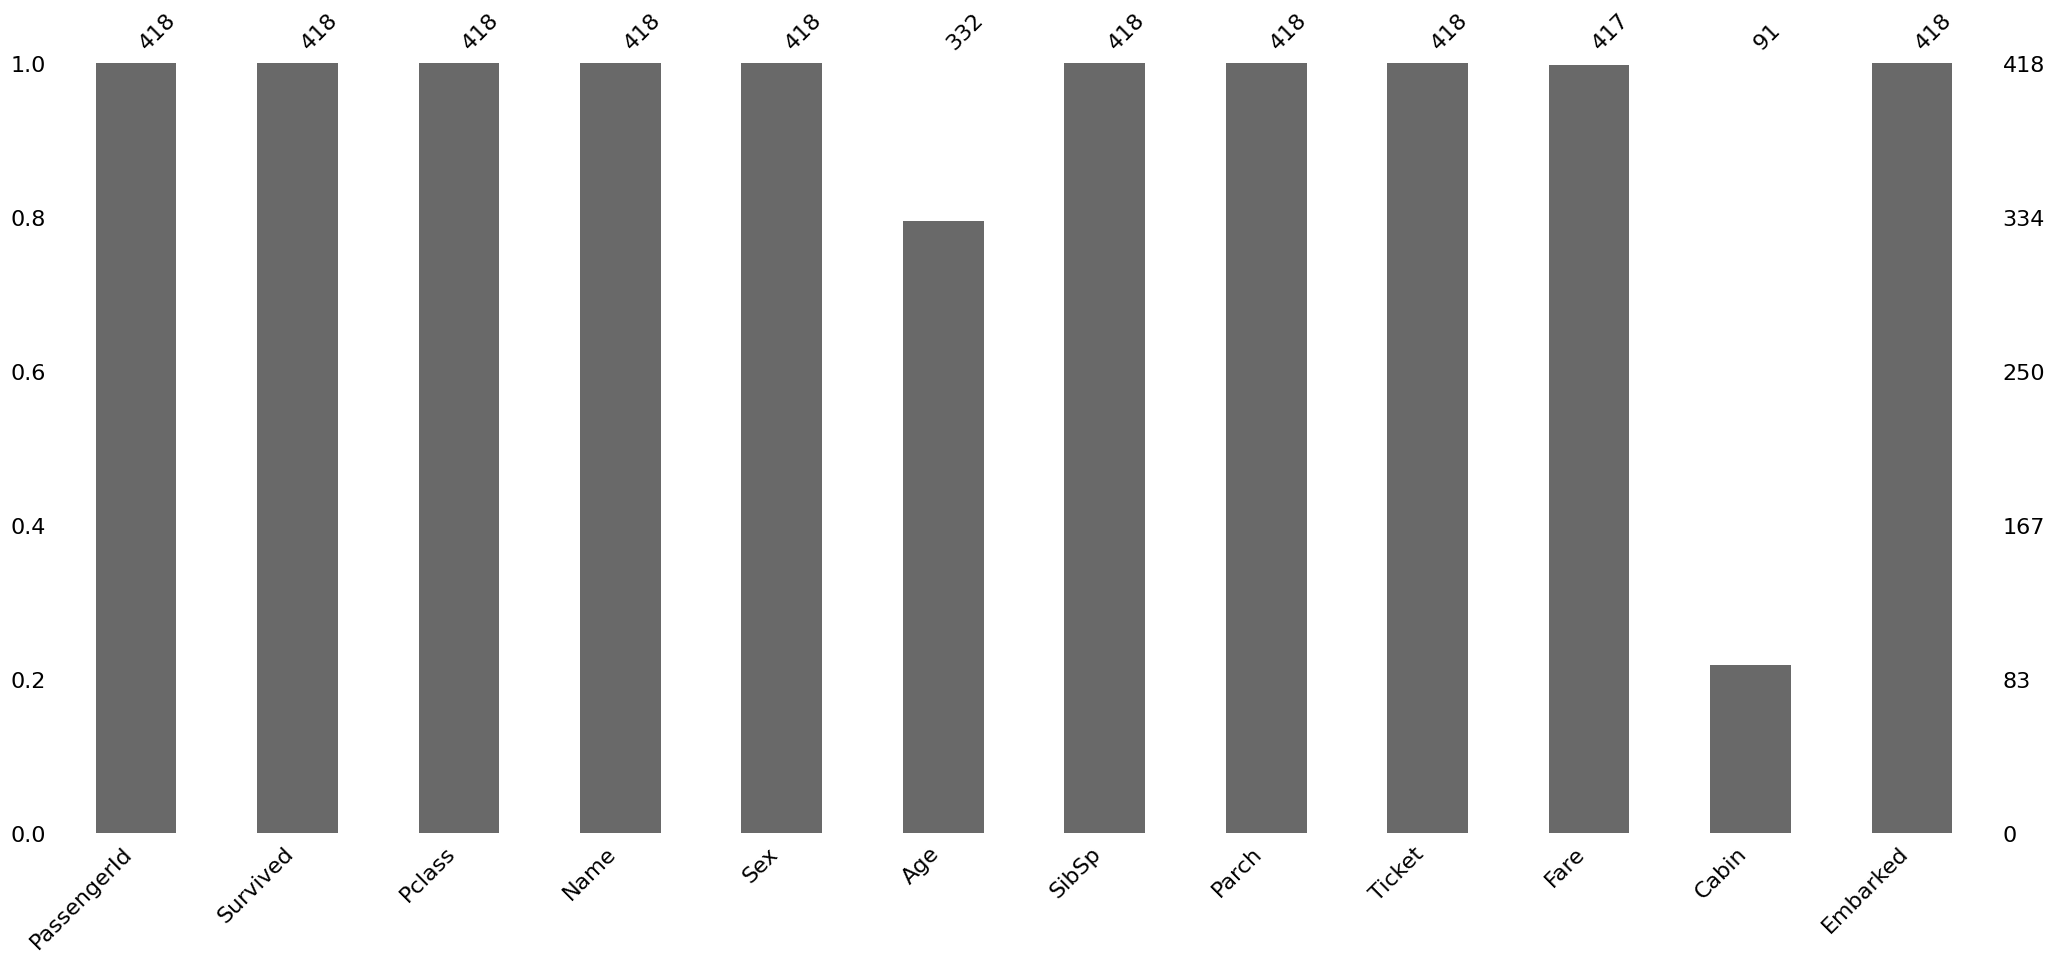

In [8]:
import missingno

missingno.bar(df)

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [14]:
Embarked = df['Embarked'].unique()
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> Q
-> S
-> C


In [15]:
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [17]:
df['Age'] = df['Age'].astype(int)

In [18]:
df['Fare'] = df['Fare'].astype(int)

In [19]:
data = df.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

<center> <h4> <b> Analyzed dataset </h4> </b> </center>

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1
...,...,...,...,...,...,...,...,...
413,0,3,0,30,0,0,8,1
414,1,1,1,39,0,0,108,2
415,0,3,0,38,0,0,7,1
416,0,3,0,30,0,0,8,1


In [21]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.363636,30.191388,0.447368,0.392344,35.184211,1.133971
std,0.481622,0.841838,0.481622,12.654104,0.896760,0.981429,55.846244,0.580452
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.000000,1.000000
50%,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.000000,1.000000
75%,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.000000,2.000000


<center> <h4> <b> Data visualization </h4> </b> </center>

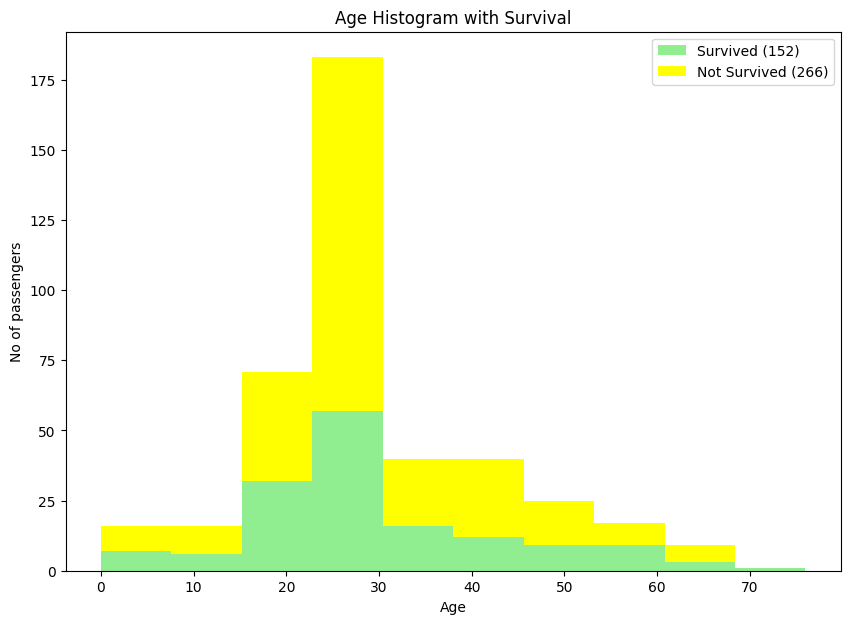

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
survived_count = len(df[df['Survived'] == 1])
not_survived_count = len(df[df['Survived'] == 0])
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['lightgreen','yellow'],label=[f'Survived ({survived_count})', f'Not Survived ({not_survived_count})'],)
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

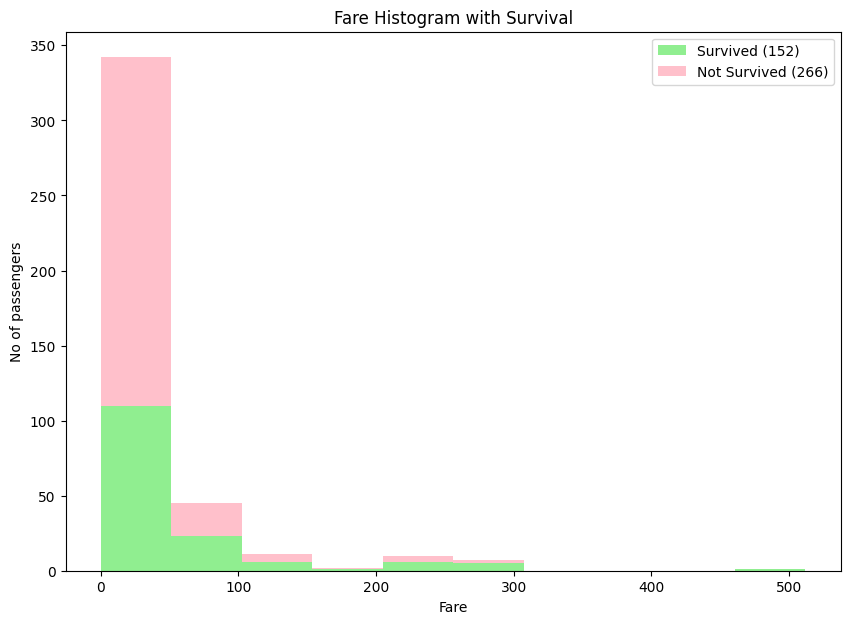

In [23]:
fig = plt.figure(figsize =(10, 7))
survived_count = len(df[df['Survived'] == 1])
not_survived_count = len(df[df['Survived'] == 0])
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['lightgreen','pink'],label=[f'Survived ({survived_count})', f'Not Survived ({not_survived_count})'],)
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

<center> <h4> <b> 266 Passenger not survived in the Titanic and 156 survived. </b> </h4> </center>

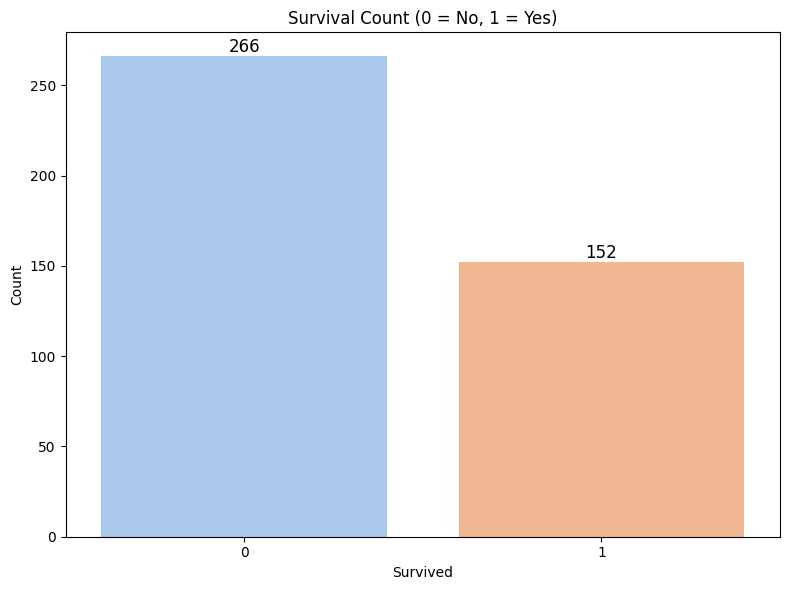

In [24]:
column = 'Survived'

sns.set_palette("pastel")
plt.figure(figsize=(8, 6))  

survival_counts = df[column].value_counts()
ax = sns.barplot(x=survival_counts.index, y=survival_counts.values)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

# Adding labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', color='black', fontsize=12, weight='light')

# Show the plot
plt.tight_layout()
plt.show()


<center> <h4> <b> Spliting data </b> </h4> </center>

In [25]:
from sklearn.model_selection import train_test_split


Train = df.drop(['Survived'], axis=1)
Test = df.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

<center> <h4><b> Model building </b></h4> </center>

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 92.86%


In [27]:
import webbrowser

url = "https://anxenown.github.io/CodSoft/Task1_CodSoft/web/index.html"
webbrowser.open(url)


True